In [368]:
import os
def get_dir(dir):
    p = []
    for root, dirs, files in os.walk(dir, topdown=False):
        for name in files:
                if name != '.DS_Store':
                    if not ('ipynb' in name):
                        p.append(os.path.join(root, name))
    return p

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport as pp

In [370]:
central = get_dir('./Datathon Final dataset/Central election 2074/')

In [371]:
central

['./Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/2.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/1.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/स्याङ्जा/2.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/स्याङ्जा/1.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/मुस्तांग/1.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/कास्की/2.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/कास्की/1.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/कास्की/3.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/लमजुंग/1.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/बागलुङ/2.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/बागलुङ/1.csv',
 './Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/तनहुँ/2.csv',
 './Datat

In [372]:
import pandas as pd

# df = pd.read_csv('./Datathon Final dataset/Central election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/2.csv')

In [373]:
df = pd.concat(map(pd.read_csv, central), ignore_index=True)


In [374]:
df = pd.concat(map(pd.read_csv, central), ignore_index=True)

In [375]:
df.head()

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,TotalVotesReceived,EStatus,Rank
0,1438.0,4.0,तिल बहादुर महत क्षेत्री,पुरुष,53.0,नेपाल कम्युनिष्ट पार्टी (एमाले),नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,39053.0,Elected,1
1,1439.0,4.0,विष्णु कुमार कार्की,पुरुष,54.0,नेपाली काँग्रेस,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,37720.0,NaN,2
2,1440.0,4.0,सिंह बहादुर थापा,पुरुष,58.0,राष्ट्रिय जनमुक्ति पार्टी,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,543.0,NaN,3
3,1441.0,NaN,ओम नारायण थनेत,पुरुष,41.0,राष्ट्रिय जनता पार्टी नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,296.0,NaN,4
4,1442.0,4.0,पिताम्वर महतो,पुरुष,31.0,नयाँ शक्ति पार्टी नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,278.0,NaN,5


In [376]:
# Total Colums

In [377]:
for i in df.columns:
    print(i)

SerialNo
StateID
CandidateName
Gender
Age
PoliticalPartyName
DistrictName
CenterConstID
TotalVotesReceived
EStatus
Rank


# Checking Null Values

In [378]:
df.isnull().sum()

SerialNo                1
StateID                 5
CandidateName           0
Gender                  4
Age                     4
PoliticalPartyName      0
DistrictName            0
CenterConstID           3
TotalVotesReceived      5
EStatus               140
Rank                    0
dtype: int64

In [379]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]



In [380]:
for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4))

SerialNo 0.0063
StateID 0.0316
Gender 0.0253
Age 0.0253
CenterConstID 0.019
TotalVotesReceived 0.0316
EStatus 0.8861


In [381]:
for feature in df.columns:
    print(df, df[feature].unique(), len(df[feature].unique()))
    print('----------------------------------------------')

     SerialNo  StateID            CandidateName Gender   Age  \
0      1438.0      4.0  तिल बहादुर महत क्षेत्री  पुरुष  53.0   
1      1439.0      4.0      विष्णु कुमार कार्की  पुरुष  54.0   
2      1440.0      4.0         सिंह बहादुर थापा  पुरुष  58.0   
3      1441.0      NaN           ओम नारायण थनेत  पुरुष  41.0   
4      1442.0      4.0            पिताम्वर महतो  पुरुष  31.0   
..        ...      ...                      ...    ...   ...   
153    1285.0      4.0            अमृत पुडासेनी  पुरुष  33.0   
154    1286.0      4.0      कृष्ण गोपाल बन्जारा  पुरुष  52.0   
155    1285.0      4.0            अमृत पुडासेनी  पुरुष  33.0   
156    1287.0      4.0            आकाश राना मगर  पुरुष  32.0   
157    1288.0      4.0        राम बहादुर नेपाली  पुरुष  37.0   

                     PoliticalPartyName                     DistrictName  \
0       नेपाल कम्युनिष्ट पार्टी (एमाले)  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
1                       नेपाली काँग्रेस  नवलपरासी (बर्दघाट सुस्ता पूर्व)   
2  

In [382]:
df.isnull().sum()

SerialNo                1
StateID                 5
CandidateName           0
Gender                  4
Age                     4
PoliticalPartyName      0
DistrictName            0
CenterConstID           3
TotalVotesReceived      5
EStatus               140
Rank                    0
dtype: int64

In [383]:
df['PoliticalPartyName'].value_counts().sort_values(ascending=False)

नेपाली काँग्रेस                                     17
नेपाल कम्युनिष्ट पार्टी (एमाले)                     13
नयाँ शक्ति पार्टी नेपाल                             13
स्वतन्त्र                                           13
मंगोल नेशनल अर्गनाइजेसन                             13
राष्ट्रिय जनमोर्चा                                  12
देशभक्त जनगणतान्त्रिक मोर्चा नेपाल                  12
राष्ट्रिय जनमुक्ति पार्टी                           11
संघीय समाजवादी फोरम नेपाल                           10
विवेकशील साझा पार्टी                                 8
नेपाल कम्युनिष्ट पार्टी (माले)                       6
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)            5
एकीकृत राष्ट्रिय प्रजातन्त्र पार्टी(राष्ट्रवादी)     5
आमूल परिवर्तन मसिहा पार्टी नेपाल                     3
नेपाली कांग्रेस (बी.पी.)                             3
नेपाल दलित पार्टी                                    3
जनसमाजवादी पार्टी नेपाल                              2
नेपाल संघीय समाजवादी पार्टी                          2
संघीय लोकत

In [384]:
redundant_party = ['?','wrc दल',' WRC',' WRC Sangathan']
for i in redundant_party:
    index_names = df[ df['PoliticalPartyName'] == i ].index
    df.drop(index_names, inplace = True)
    

In [385]:
df['PoliticalPartyName'].value_counts().sort_values(ascending=False)

नेपाली काँग्रेस                                     17
नेपाल कम्युनिष्ट पार्टी (एमाले)                     13
नयाँ शक्ति पार्टी नेपाल                             13
स्वतन्त्र                                           13
मंगोल नेशनल अर्गनाइजेसन                             13
राष्ट्रिय जनमोर्चा                                  12
देशभक्त जनगणतान्त्रिक मोर्चा नेपाल                  12
राष्ट्रिय जनमुक्ति पार्टी                           11
संघीय समाजवादी फोरम नेपाल                           10
विवेकशील साझा पार्टी                                 8
नेपाल कम्युनिष्ट पार्टी (माले)                       6
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)            5
एकीकृत राष्ट्रिय प्रजातन्त्र पार्टी(राष्ट्रवादी)     5
आमूल परिवर्तन मसिहा पार्टी नेपाल                     3
नेपाली कांग्रेस (बी.पी.)                             3
नेपाल दलित पार्टी                                    3
जनसमाजवादी पार्टी नेपाल                              2
नेपाल संघीय समाजवादी पार्टी                          2
संघीय लोकत

In [386]:
elected_dataset = df[df['EStatus']=='Elected']
elected_dataset.head()

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,TotalVotesReceived,EStatus,Rank
0,1438.0,4.0,तिल बहादुर महत क्षेत्री,पुरुष,53.0,नेपाल कम्युनिष्ट पार्टी (एमाले),नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,39053.0,Elected,1
13,1430.0,4.0,शशांक कोइराला,पुरुष,59.0,नेपाली काँग्रेस,नवलपरासी (बर्दघाट सुस्ता पूर्व),1.0,40620.0,Elected,1
21,1374.0,4.0,पद्‍मा कुमारी अर्याल,महिला,48.0,नेपाल कम्युनिष्ट पार्टी (एमाले),स्याङ्जा,2.0,35142.0,Elected,1
29,1367.0,4.0,नारायण प्रसाद मरासिनी,पुरुष,49.0,नेपाल कम्युनिष्ट पार्टी (एमाले),स्याङ्जा,1.0,39226.0,Elected,1
36,1591.0,4.0,प्रेम प्रसाद तुलाचन,पुरुष,55.0,नेपाल कम्युनिष्ट पार्टी (एमाले),मुस्तांग,1.0,3544.0,Elected,1


In [387]:
elected_dataset["PoliticalPartyName"].value_counts()

नेपाल कम्युनिष्ट पार्टी (एमाले)              13
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)     3
नेपाली काँग्रेस                               1
नयाँ शक्ति पार्टी नेपाल                       1
Name: PoliticalPartyName, dtype: int64

<AxesSubplot:xlabel='PoliticalPartyName', ylabel='count'>

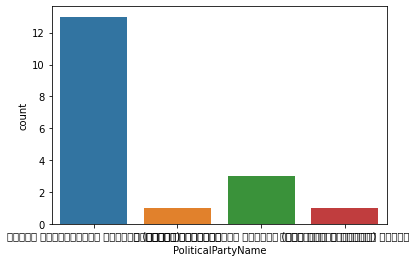

In [388]:
sns.countplot(elected_dataset['PoliticalPartyName'])

# Female-Candidate

In [389]:
female_candidate = df[df['Gender']=='महिला']

In [390]:
female_candidate.head()

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,TotalVotesReceived,EStatus,Rank
7,1444.0,4.0,फुल कुमारी पुर्जा पुन,महिला,66.0,संघीय समाजवादी फोरम नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,79.0,NaN,7
21,1374.0,4.0,पद्‍मा कुमारी अर्याल,महिला,48.0,नेपाल कम्युनिष्ट पार्टी (एमाले),स्याङ्जा,2.0,35142.0,Elected,1
42,1326.0,4.0,रत्‍न भट्टचन,महिला,63.0,संघीय समाजवादी फोरम नेपाल,कास्की,2.0,340.0,NaN,5
46,1330.0,4.0,दाल कुमारी खत्री,महिला,48.0,राष्ट्रिय जनमोर्चा,कास्की,2.0,108.0,NaN,9
48,1332.0,4.0,लक्ष्मी बिश्वकर्मा,महिला,51.0,नेपाल दलित पार्टी,कास्की,2.0,65.0,NaN,11


In [391]:
female_candidate.isnull().sum()

SerialNo              0
StateID               0
CandidateName         0
Gender                0
Age                   0
PoliticalPartyName    0
DistrictName          0
CenterConstID         0
TotalVotesReceived    0
EStatus               9
Rank                  0
dtype: int64

In [392]:
wining_female_candidate = elected_dataset[elected_dataset['Gender']=='महिला']

In [393]:
wining_female_candidate

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,TotalVotesReceived,EStatus,Rank
21,1374.0,4.0,पद्‍मा कुमारी अर्याल,महिला,48.0,नेपाल कम्युनिष्ट पार्टी (एमाले),स्याङ्जा,2.0,35142.0,Elected,1


Observation: Only one female has won for central election

# Extracting  Numerical Column

In [394]:
numerical_colum = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [395]:
numerical_colum

['SerialNo', 'StateID', 'Age', 'CenterConstID', 'TotalVotesReceived', 'Rank']

In [396]:
# Scatter Plot between Age and Vote

<AxesSubplot:>

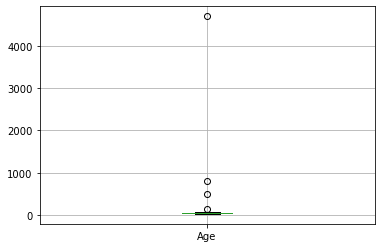

In [397]:
df.boxplot('Age')

In [398]:
df['Age'].describe()

count     154.000000
mean       86.623377
std       380.939363
min        25.000000
25%        39.000000
50%        49.000000
75%        58.000000
max      4700.000000
Name: Age, dtype: float64

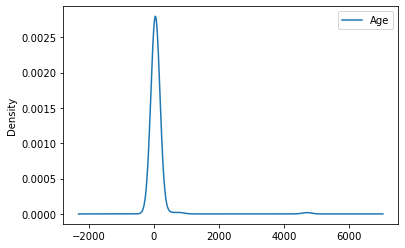

In [399]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [400]:
df.columns

Index(['SerialNo', 'StateID', 'CandidateName', 'Gender', 'Age',
       'PoliticalPartyName', 'DistrictName', 'CenterConstID',
       'TotalVotesReceived', 'EStatus', 'Rank'],
      dtype='object')

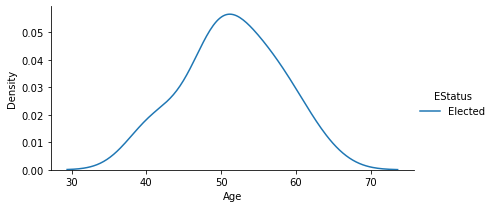

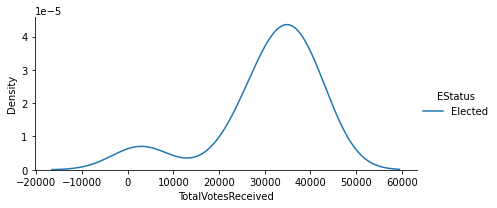

In [401]:
required_column = ['Age','TotalVotesReceived']
for feature in required_column:
    grid=sns.FacetGrid(df,hue='EStatus',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

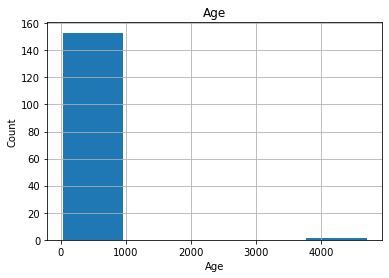

In [402]:
for feature in ['Age']:
    dataset=df.copy()
    dataset[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Our outliear lies

In [403]:
##Outliers on age

In [404]:
def outlier_threshold(df,x):
    q1 = df[x].quantile(0.3)
    q3 = df[x].quantile(0.75)
    IQR = q3-q1
    low  = q1 - 1.5*IQR
    high = q3 + 1.5*IQR
    return low, high

In [405]:
low, high = outlier_threshold(df, 'Age')

In [406]:
low,high

(15.5, 83.5)

In [407]:
median= df['Age'].median()

In [408]:
df["Age"] = np.where(df["Age"] <low, median, df['Age'])

In [409]:
df["Age"] = np.where(df["Age"] >high, median, df['Age'])

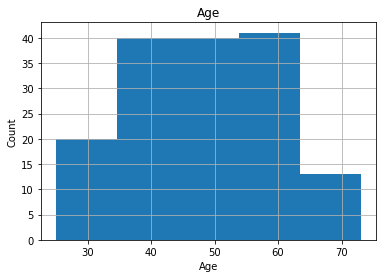

In [410]:
for feature in ['Age']:
    dataset=df.copy()
    dataset[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

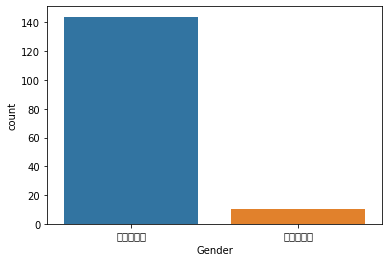

In [411]:
sns.countplot(df['Gender'])

In [412]:
df.groupby('Gender').mean()

,SerialNo,StateID,Age,CenterConstID,TotalVotesReceived,Rank
Gender,,,,,,
पुरुष,1399.230769,4.0,47.778571,1.48227,8984.625899,5.326389
महिला,1459.400000,4.0,50.100000,1.60000,5674.400000,7.100000


In [413]:
df.groupby(['DistrictName']).size()

DistrictName
कास्की                             36
गोरखा                              18
तनहुँ                              21
नवलपरासी (बर्दघाट सुस्ता पूर्व)    20
पर्वत                              14
बहिर                                1
बागलुङ                             11
मनाङ्ग                              2
मुस्तांग                            2
म्याग्दी                            7
लमजुंग                             11
स्याङ्जा                           15
dtype: int64

Observation: बहिर is wrong value

In [414]:
df['DistrictName'].mode()[0]

'कास्की'

In [415]:
cat_col = [feature for feature in df.columns if df[feature].dtypes =='O']

In [416]:
df['DistrictName'] = df['DistrictName'].str.replace('बहिर','कास्की')


In [417]:
df.groupby(['DistrictName']).size()

DistrictName
कास्की                             36
कास्की                              1
गोरखा                              18
तनहुँ                              21
नवलपरासी (बर्दघाट सुस्ता पूर्व)    20
पर्वत                              14
बागलुङ                             11
मनाङ्ग                              2
मुस्तांग                            2
म्याग्दी                            7
लमजुंग                             11
स्याङ्जा                           15
dtype: int64

In [132]:
df['DistrictName'].mode()[0]

'कास्की'

In [140]:
##Handling NullValues

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SerialNo            157 non-null    float64
 1   StateID             153 non-null    float64
 2   CandidateName       158 non-null    object 
 3   Gender              154 non-null    object 
 4   Age                 154 non-null    float64
 5   PoliticalPartyName  158 non-null    object 
 6   DistrictName        158 non-null    object 
 7   CenterConstID       155 non-null    float64
 8   TotalVotesReceived  153 non-null    float64
 9   EStatus             18 non-null     object 
 10  Rank                158 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 13.7+ KB


In [141]:
df.drop(['SerialNo'], axis =1, inplace =True)

In [143]:
dataset = df.copy()

Since, Gandaki State is oviously state 4, so we can drop it as well

In [147]:
df.drop(['StateID'], axis =1, inplace =True)

In [160]:
df['CenterConstID'] = df['CenterConstID'].fillna(df['CenterConstID'].mode())

In [161]:
rank_1 = df[df['Rank']==1]


In [163]:
rank_1['EStatus'].value_counts()

Elected    18
Name: EStatus, dtype: int64

# Hence,all missing values are not ELected one.

In [166]:
df['EStatus'] = df['EStatus'].fillna('Not Elected')

In [167]:
df.head()

,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,TotalVotesReceived,EStatus,Rank
0,तिल बहादुर महत क्षेत्री,पुरुष,53.0,नेपाल कम्युनिष्ट पार्टी (एमाले),नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,39053.0,Elected,1
1,विष्णु कुमार कार्की,पुरुष,54.0,नेपाली काँग्रेस,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,37720.0,Not Elected,2
2,सिंह बहादुर थापा,पुरुष,58.0,राष्ट्रिय जनमुक्ति पार्टी,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,543.0,Not Elected,3
3,ओम नारायण थनेत,पुरुष,41.0,राष्ट्रिय जनता पार्टी नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,296.0,Not Elected,4
4,पिताम्वर महतो,पुरुष,31.0,नयाँ शक्ति पार्टी नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2.0,278.0,Not Elected,5


In [169]:
df.isnull().sum()

CandidateName         0
Gender                4
Age                   4
PoliticalPartyName    0
DistrictName          0
CenterConstID         3
TotalVotesReceived    5
EStatus               0
Rank                  0
dtype: int64

In [172]:
feature_with_null_value = feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]

In [173]:
feature_with_na

['Gender', 'Age', 'CenterConstID', 'TotalVotesReceived']

In [177]:
for i in feature_with_na:
    df[i] = df[i].fillna(df[i].mode())

In [178]:
df.isnull().sum()

CandidateName         0
Gender                4
Age                   4
PoliticalPartyName    0
DistrictName          0
CenterConstID         3
TotalVotesReceived    5
EStatus               0
Rank                  0
dtype: int64

Since the available nan is not in np.NaN from, we can do it by replacing

In [183]:
categorical_feather_with_nan = [feature for feature in feature_with_na if df[feature].dtype =='O']

In [180]:
categorical_feather_with_nan

['Gender']

In [182]:
for i in categorical_feather_with_nan:
    df[i] = df[i].replace('nan',np.NaN)


In [184]:
numerical_feature_with_nan = [feature for feature in feature_with_na if df[feature].dtype !='O']

In [185]:
numerical_feature_with_nan

['Age', 'CenterConstID', 'TotalVotesReceived']

In [198]:
for i in categorical_feather_with_nan:
    df[i] = df[i].replace('nan',np.NaN)


In [199]:
for i in feature_with_na:
    df[i] = df[i].fillna(df[i].mode())

In [203]:
df.isnull().sum()

CandidateName         0
Gender                4
Age                   4
PoliticalPartyName    0
DistrictName          0
CenterConstID         3
TotalVotesReceived    5
EStatus               0
Rank                  0
dtype: int64

In [423]:
categorical_feather_with_nan

['Gender']

In [424]:
def impute_nan_num(df, variable):
    median = df[variable].median()
    
    df[variable+'_median'] = df[variable].fillna(median)

In [425]:
for i in numerical_feature_with_nan:
    impute_nan_num(df,i)

In [426]:
def impute_nan_cat(df, variable):
    mode = df[variable].mode()
    df[variable+'_mode'] = df[variable].fillna(mode)

In [427]:
for i in categorical_feather_with_nan:
    impute_nan_cat(df,i)

In [438]:
df.isnull().sum()

CandidateName                  0
PoliticalPartyName             0
DistrictName                   0
EStatus                      140
Rank                           0
Age_median                     0
CenterConstID_median           0
TotalVotesReceived_median      0
Gender_mode                    0
dtype: int64

In [431]:
df['Gender_mode'].unique()

array(['पुरुष', 'महिला', nan], dtype=object)

In [432]:
df['Gender_mode'] = df['Gender_mode'].replace(np.NaN, df['Gender_mode'].mode()[0])

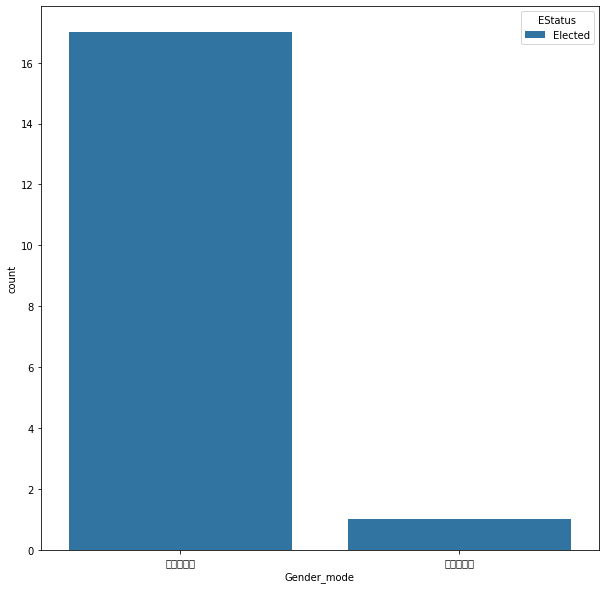

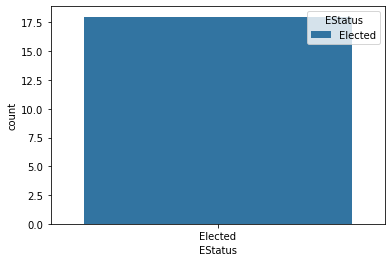

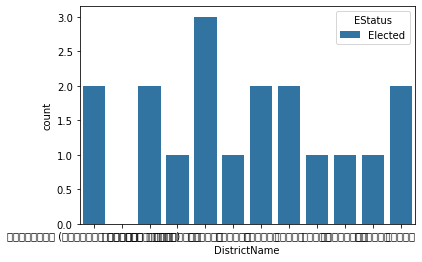

In [433]:
plt.figure(figsize=(10,10))
cat_col =['Gender_mode','EStatus','DistrictName']
for i,feature in enumerate(cat_col):
    sns.countplot(df[feature],hue=df['EStatus'])
    plt.show()

In [434]:
df.drop(['CenterConstID','Gender','Age','TotalVotesReceived'],axis =1, inplace = True)

In [442]:
df.isnull().sum()

CandidateName                0
PoliticalPartyName           0
DistrictName                 0
EStatus                      0
Rank                         0
Age_median                   0
CenterConstID_median         0
TotalVotesReceived_median    0
Gender_mode                  0
dtype: int64

In [441]:
df['EStatus'] = df['EStatus'].fillna('Not Elected')

In [436]:
##Our data is clean

In [443]:
df.isnull().sum()

CandidateName                0
PoliticalPartyName           0
DistrictName                 0
EStatus                      0
Rank                         0
Age_median                   0
CenterConstID_median         0
TotalVotesReceived_median    0
Gender_mode                  0
dtype: int64